# 「EDA」时空问题之厄尔尼诺预测

作者: Adam

Github: https://github.com/ydup

欢迎关注微信公众号：惊鸿的世界

![img](http://yadongz.com/images/wechat.gif)

In [ ]:
import numpy as np
import matplotlib.pyplot as  plt
import netCDF4
import seaborn as sns
from global_land_mask import globe
import numpy as np
from scipy import interpolate

# 加载数据 (Data Overview)

In [2]:
path = '/Users/apple/Downloads/enso_round1_train_20210201/'
data = netCDF4.Dataset(path+'SODA_train.nc') # SODA_train.nc path
label = netCDF4.Dataset(path+'SODA_label.nc') # SODA_train.nc path
label = np.array(label.variables['nino'])

In [3]:
print(data.variables['sst'].shape)

(100, 36, 24, 72)


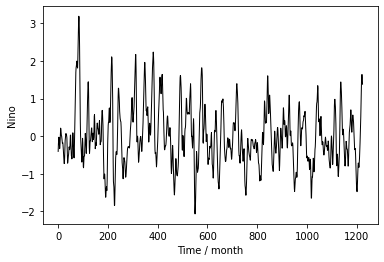

In [4]:
# nino curve
label_all = [label[0]] + [label[i, 24:] for i in range(1, label.shape[0])]
label_all = np.concatenate(label_all, axis=0)
plt.plot(label_all, 'k', linewidth=1)
plt.xlabel('Time / month')
plt.ylabel('Nino')
plt.show()

In [5]:
lon = np.array(data.variables['lon'])
lat = np.array(data.variables['lat'])

# 海陆掩膜及插值 ( Land Mask and Interpolation)

In [6]:
x = lon
y = lat
xx, yy = np.meshgrid(x, y)
z = data.variables['sst'][0,0]
f = interpolate.interp2d(x, y, z, kind='cubic')

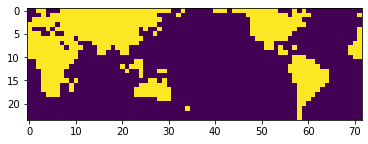

In [7]:
lon_grid, lat_grid = np.meshgrid(x-180, y)
# Check if a point is on land:
is_on_land = globe.is_land(lat_grid, lon_grid)
is_on_land = np.concatenate([is_on_land[:,x>=180], is_on_land[:,x<180]], axis=1)
z[is_on_land] = np.nan
plt.imshow(is_on_land[::-1,:])

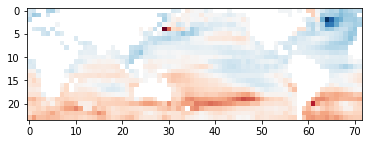

In [8]:
plt.imshow(z[::-1,:], cmap=plt.cm.RdBu_r)

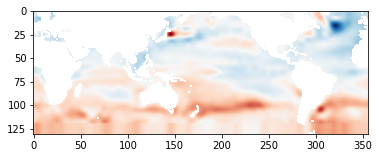

In [9]:
xnew = np.arange(0,356,1)
ynew = np.arange(-65,66,1)
znew = f(xnew, ynew)

lon_grid, lat_grid = np.meshgrid(xnew-180, ynew)
# Check if a point is on land:
is_on_land = globe.is_land(lat_grid, lon_grid)
is_on_land = np.concatenate([is_on_land[:,xnew>=180], is_on_land[:,xnew<180]], axis=1)
znew[is_on_land] = np.nan
plt.imshow(znew[::-1,:], cmap=plt.cm.RdBu_r)#is_on_land[:,:])

# 缺失值分析 (Analysis of Nan Number)

In [10]:
path = '/Users/apple/Downloads/enso_round1_train_20210201/'
data = netCDF4.Dataset(path+'CMIP_train.nc') 
label = netCDF4.Dataset(path+'CMIP_label.nc')
label = np.array(label.variables['nino'])

In [11]:
lon_grid, lat_grid = np.meshgrid(x-180, y)
is_on_land = globe.is_land(lat_grid, lon_grid)
is_on_land = np.concatenate([is_on_land[:,x>=180], is_on_land[:,x<180]], axis=1)
mask = np.zeros(data.variables['t300'].shape, dtype=int)
mask[:,:,:,:] = is_on_land[np.newaxis,np.newaxis,:,:]

In [12]:
name = 'va'

In [13]:
data_ = np.array(data.variables[name])
before_nan = np.sum(np.isnan(data_))
print('before:', before_nan)

before: 13921123


In [14]:
m = np.zeros(data_.shape[0:2])
for i in range(data_.shape[0]):
    for j in range(data_.shape[1]):
        if np.sum(np.isnan(data_[i,j])) != 0:
            m[i, j] = np.sum(np.isnan(data_[i,j]))

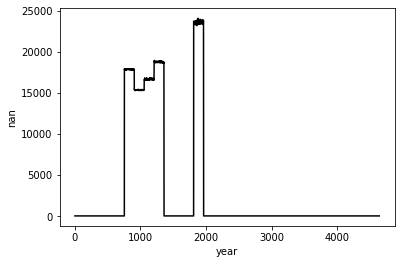

In [15]:
before = np.sum(m, axis=1)
plt.plot(before, 'k')
plt.ylabel('nan')
plt.xlabel('year')
plt.show()

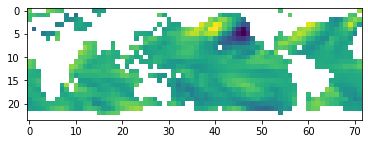

In [16]:
plt.imshow(data_[1900,0][::-1,:])

In [17]:
# fix land with zero
data_[mask==1] = 0


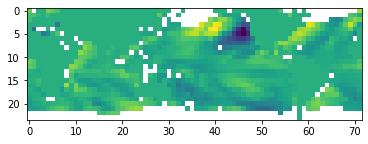

In [18]:
plt.imshow(data_[1900,0][::-1,:])

In [19]:
after_nan = np.sum(np.isnan(data_))

In [22]:
print('before:%d\nafter:%d\npercentage:%f'%(before_nan, after_nan, 1-float(after_nan)/before_nan))

before:13921123
after:2440742
percentage:0.824673


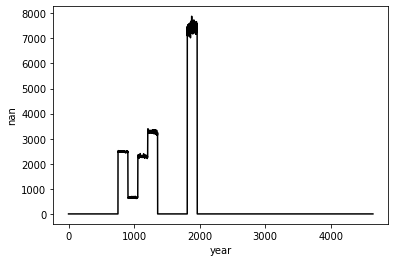

In [23]:
m = np.zeros(data_.shape[0:2])
for i in range(data_.shape[0]):
    for j in range(data_.shape[1]):
        if np.sum(np.isnan(data_[i,j])) != 0:
            m[i, j] = np.sum(np.isnan(data_[i,j]))
after = np.sum(m, axis=1)
plt.plot(after, 'k')
plt.ylabel('nan')
plt.xlabel('year')
plt.show()

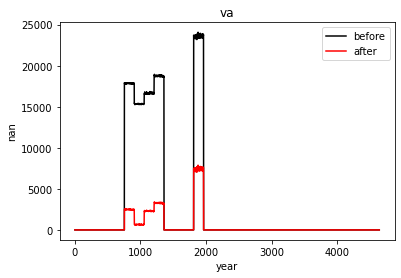

In [24]:
plt.plot(before, 'k')
plt.plot(after, 'r')
plt.legend(['before', 'after'])
plt.title(name)
plt.ylabel('nan')
plt.xlabel('year')
plt.show()

# 温度场和风场可视化 (Visualization of the Temperature and Wind Domain)

In [25]:
x = lon
y = lat
xx, yy = np.meshgrid(x, y)
z = data.variables['sst'][0,0]
f = interpolate.interp2d(x, y, z, kind='cubic')
lon_grid, lat_grid = np.meshgrid(x-180, y)
is_on_land = globe.is_land(lat_grid, lon_grid)
is_on_land = np.concatenate([is_on_land[:,x>=180], is_on_land[:,x<180]], axis=1)
mask = np.zeros(data.variables['t300'].shape, dtype=int)
mask[:,:,:,:] = is_on_land[np.newaxis,np.newaxis,:,:]

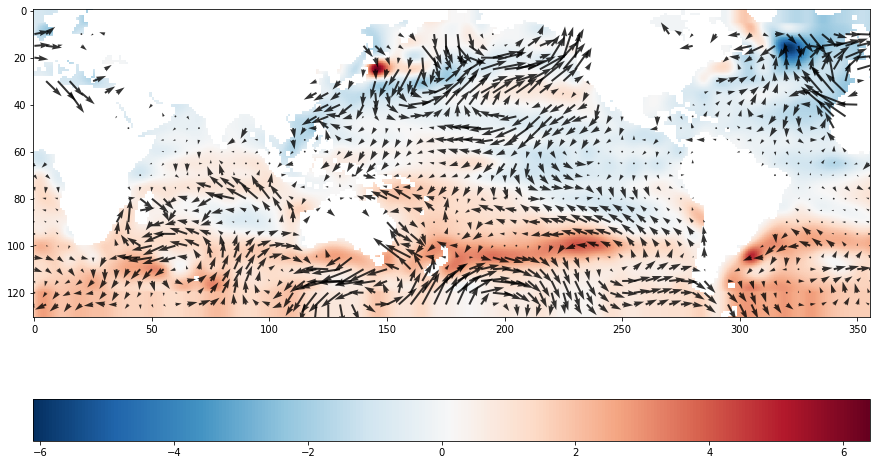

In [26]:
lon_grid, lat_grid = np.meshgrid(x-180, y)
# Check if a point is on land:
is_on_land = globe.is_land(lat_grid, lon_grid)
is_on_land = np.concatenate([is_on_land[:,x>=180], is_on_land[:,x<180]], axis=1)

ua = data.variables['ua'][0, 0]
ua[is_on_land] = np.nan
va = data.variables['va'][0, 0]
va[is_on_land] = np.nan

lon_grid, lat_grid = np.meshgrid(xnew-180, ynew)
# Check if a point is on land:
is_on_land = globe.is_land(lat_grid, lon_grid)
is_on_land = np.concatenate([is_on_land[:,xnew>=180], is_on_land[:,xnew<180]], axis=1)
znew[is_on_land] = np.nan
plt.figure(figsize=(15,10))
plt.imshow(znew[::-1,:], cmap=plt.cm.RdBu_r)
plt.colorbar(orientation='horizontal')
plt.quiver(lon, lat+65, ua[::-1,:], va[::-1,:], alpha=0.8)
plt.show()